# INTRINSIC DISEASE MAPS USING PERSISTENT COHOMOLOGY

The goal of this notebook is to employ persistent cohomology to compute circular coordinate functions of disease progression datasets using a library built for this task with giotto-tda compatibility as a design goal. The generated circular coordinate function provides an intrinsic disease phase coordinate that maps out the disease progression in the full data space.
<table><tr>

<td> <img src="d1.PNG" style="width: 300px;"/> </td>
<td> <img src="d2.PNG" style="width: 300px;"/> </td>
</tr></table>

Figure 1. Left:The circular coordinates of a malaria dataset plotted alongside days post infection.  Right: the PCA plot of the data colored by body temperature of the patients. The region of points where the circular coordinate is changing corresponds precisely to the region of points where the body temperature is elevated.

# 1. Introduction and Motivation

A disease map is a mapper complex built from physiological data of the population used to map out disease. Disease maps were introduced in [1] as a visualization technique to study progression of infectious diseases from data taken at different stages of the disease progression. The authors trace out Mapper complexes that prominently feature a loop structure, and are able to connect that loop structure to the phases of infection. As observed in [2], mapper complexes can both obscure and introduce topological features if the mapper cover is not approximately a good cover in a topological sense. This provokes a reseach problem and thus the motivation behind our work: whether the loop structure observed in the disease maps exist in the original data space. As dimensionality reduction techniques carry the same potential of accidentally introducing topological structures, the same question can be asked of loop structures that emerge in low-dimensional PCA projections of the data.
This notebook reiterates the work of [4] by examining two datasets drawn from the study of Malaria in mice and in humans, and one dataset drawn from the study of Hepatitis C in humans.On these datasets we then compute circular coordinates using the methodology introduced in [3]. The generated circular coordinate function provides an intrinsic disease phase coordinate that maps out the disease progression in the full data space.

We demonstrate a powerful library utilising the ripser backend for fast Vietoris-Rips calculation created with easy to use giotto-tda compatible code which can is used to create circular coordinates from data.



[1] B. Y. Torres, J. H. M. Oliveira, A. Thomas Tate, P. Rath, K. Cumnock and D. S. Schneider,  Tracking resilience to infections by mapping disease space, PLoS biology, (2016), e1002436.

[2] M. Vejdemo-Johansson and A. Leshchenko, Certified mapper: Repeated testing for acyclicity and obstructions

[3] V. de Silva, D. Morozov and M. Vejdemo-Johansson, Persistent cohomology and circular coordinates, Discrete & Computational Geometry, (2011), 737–759.

[4] Daniel Amin and M. Vejdemo-Johansson, Intrinsic disease maps using persistent cohomology, Foundations of Data Science, 2021-4-16.

## Outline

In this notebook, we will:
- Compute circular coordinates of multiple disease progression datasets using the circularcoordinates library.
- Visualize these coordinates and look for coorelation to the temporal aspect of the data 
- Highlight benefits of this method and our library

# 2. Analysis

We import required Python packages.

In [69]:
import sys
#our library
!{sys.executable} -m pip install  git+https://github.com/appliedtopology/circular-coordinates.git

!{sys.executable} -m pip install  dionysus
!{sys.executable} -m pip install  PyQt5

!{sys.executable} -m pip install  numpy --upgrade

  Cloning https://github.com/appliedtopology/circular-coordinates.git to /tmp/pip-req-build-6acfl20v
  Running command git clone -q https://github.com/appliedtopology/circular-coordinates.git /tmp/pip-req-build-6acfl20v
  Created wheel for circularcoordinates: filename=circularcoordinates-0.1.1-cp37-none-any.whl size=9668 sha256=6f08cf38a5d5e1102a971e82f269d12a2033ec9ad8a6b1282b876d8650194af3
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_jazarr/wheels/7b/5d/03/83ab9652fd1106bddc3091cc78dfcd3569d9d416e5d3baa8cb
Successfully built circularcoordinates
Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.2)


In [62]:
import warnings
warnings.filterwarnings('ignore')





## 2.1. Datasets descriptions


One dataset is drawn from [4] and provides weight, glucose concentration, red blood cell counts and cytometric cell counts from mice infected with malaria parasites. The second dataset is drawn from [6] and contains RNA expression rates for 109 different RNA snippets. The third dataset comes from [5] and contains RNA expression rates for 56,300 different RNA snippets.

[4] K. Cumnock, A. S. Gupta, M. Lissner, V. Chevee, N. M. Davis and D. S. Schneider, Host energy source is important for disease tolerance to malaria, Current Biology, (2018), 1635–1642.

[5] B. R. Rosenberg, M. Depla, C. A. Freije, D. Gaucher, S. Mazouz, M. Boisvert, N. B´edard, J. Bruneau, C. M. Rice and N. H. Shoukry, Longitudinal transcriptomic characterization of the immune response to acute hepatitis c virus infection in patients with spontaneous viral
 clearance, PLoS pathogens, (2018), e1007290.

 [6] B. Y. Torres, J. H. M. Oliveira, A. Thomas Tate, P. Rath, K. Cumnock and D. S. Schneider,
Tracking resilience to infections by mapping disease space, PLoS biology,  (2016), e1002436.


## 2.2. First Dataset: Energy Levels and Malaria Behavior

In [63]:
import pandas as pd

df = pd.read_csv('060117.csv')

df.head()

,Day,Mouse,Infected?,Weight,Glucose,Accuri,RBC,Parasitemia,Parasite Density,Lived,Percent Weight Change
0,0,1,0,20.69,115.0,13681.0,6.8405,NaN,NaN,1,-5.868972
1,0,2,1,20.70,126.0,15188.0,7.5940,NaN,NaN,0,-3.988868
2,0,3,1,21.72,127.0,15860.0,7.9300,NaN,NaN,1,-5.318221
3,0,4,1,20.63,134.0,14522.0,7.2610,NaN,NaN,1,-8.837826
4,0,5,1,21.44,139.0,15027.0,7.5135,NaN,NaN,1,-4.583890


We drop categorical and dependent data to create features for the Vietoris-Rips complex filtration

In [64]:
features = df[['Weight', 'Glucose', 'Accuri', 'RBC']]
features.head()

,Weight,Glucose,Accuri,RBC
0,20.69,115.0,13681.0,6.8405
1,20.70,126.0,15188.0,7.5940
2,21.72,127.0,15860.0,7.9300
3,20.63,134.0,14522.0,7.2610
4,21.44,139.0,15027.0,7.5135


Data is then normalised

In [65]:
from sklearn.preprocessing import StandardScaler
features = features.dropna()
features = StandardScaler().fit_transform(features)
features[0]

array([0.29291564, 1.30639355, 1.09038073, 1.09038073])

We then use our library to instantly calculate the circular coordinates using the Vietoris-Rips complex filtration and choosing the longest persistence barcode all in the background. Only prerequisite to initialise is the prime basis over which to compute homology.

In [66]:
import circularcoordinates
prime=11
circ=circularcoordinates.circular_coordinate(prime)
vertex_values=circ.fit_transform(features)

Library can also be used to plot the persistence barcodes if one wants to choose a different value for the epsilon when calculating the circular coordinates

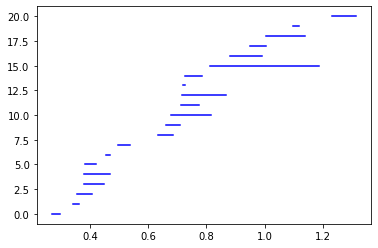

In [67]:
circ.plot_barcode(circ.rips['dgms'][1])

We plot the 2 dimensional pca of the features colored by the circular coordinates mapped from 0 to 1. The colors alternate according to the color wheel and thus visually represent a complete loop from 0 to 1. 

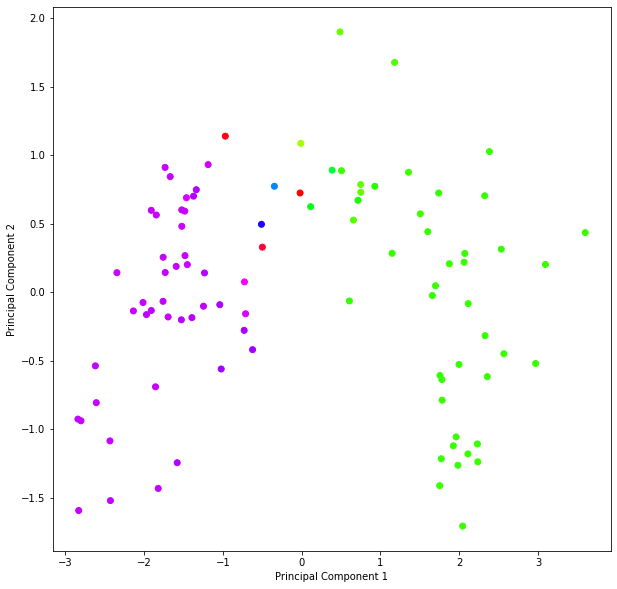

In [40]:
circ.plot_pca(features,vertex_values)

In [41]:
features = df[['Day', 'Weight', 'Glucose', 'Accuri', 'RBC', 'Percent Weight Change']]
features = features.dropna()

We can also plot the circular coordinates vs external data to visualize patterns that might emerge

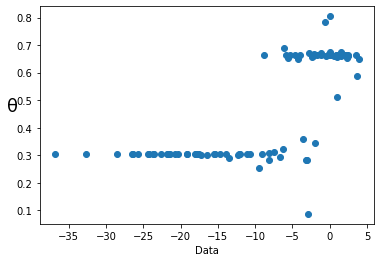

In [42]:
circ.plot_eps(features['Percent Weight Change'],vertex_values)

θ(circular coordinates) gives some separation to percent weight changes. As discussed in the paper[4] corresponding to this data,
Weight changes correspond to energy levels of animals infected. The mapping shows two groups here as well,
one with small negative or positive weight changes, the other with big negative weight changes. 
As energy levels of each animal decreases, they get into the sick disease stage, while they get into recovery in
the other direction.

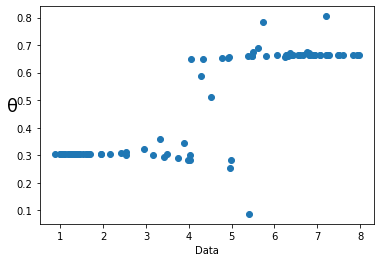

In [43]:
circ.plot_eps(features['RBC'],vertex_values)

We can see that the circular coordinate θ creates a separation in the RBC (red blood cells count). The authors of the first paper[4] discuss the importance of energy levels with respect to survival and disease tolerance. It is fascinating to see that our mapping corroborates that idea; as red blood cells count increases, the disease gets into a different stage (recovery) while the lower counts correspond to a different stage (sick) and some intermediary transition in between.

## 2.3. Second Dataset:  Malaria Data (RNA Expressions)

In [44]:
import pandas as pd

df = pd.read_csv('malaria.csv')

df.head()

,Sample ID,Day Post Infection,Log PD,PD,RBC,Temp,Weight,Mouse Categorical,Mouse,Status Number,Status,P2rx1,P2rx1.1,Lcn2,Glrx5,Ranbp10,S100a9,Fcrla,Fcrla.1,Fcrla.2,Fcrla.3,Stfa1,Epb4.1,Adipor1,Nkg7,Ngp,Flot2,Flot2.1,Abcb4,Chchd10,Chi3l1,Ank1,Ank1.1,Lck,Mllt3,Mllt3.1,Mllt3.2,Ccl5,Hp,Hp.1,...,Mrgpra2,Mta3,Mta3.1,Thy1,Selplg,Slc25a39,Saa3,Cd79b,Cd79b.1,Cd3d,Ltf.1,Klhl6,Klhl6.1,Klhl6.2,Retnlg,Flot2.2,Chi3l3.2,Immp2l,Ppox,Ppox.1,Rhag.1,Rhag.2,Camp,Pkig,Pkig.1,Snn,Mgst3,Mgst3.1,Urod,Flot2.3,Cd177,Cd177.1,Xpo7,Xpo7.1,Xpo7.2,Sh2d2a,Dok3,Mrgpra2.1,Aqp9,Pkig.2
0,8942406001_A,0,-5.000000,0.000010,8.12,38.1,100.000000,One,3.3,1,Survivor,-0.097622,-0.032001,-0.170732,-0.081750,-0.184406,0.377581,0.445490,1.217868,1.629576,1.307045,0.039177,0.024081,0.329223,0.058718,-0.447428,1.001138,0.031189,-0.241752,0.324359,-0.026205,-0.117455,-0.355872,0.432130,0.099539,0.083233,-0.282950,0.240191,0.201205,0.198752,...,-0.007795,0.086427,-0.039685,0.389628,0.435770,-0.117985,-0.150807,1.394551,1.235512,0.605800,-0.157575,0.689930,0.099542,0.441986,0.429803,1.272825,0.231318,-0.022630,-0.031815,-0.093089,-0.212555,-0.313936,-0.229783,0.380955,-0.255265,1.457287,-0.407985,-0.366624,-0.283391,-0.022198,-0.056000,0.111028,-0.018201,-0.101437,-0.091249,0.208525,0.718664,-0.080027,0.043758,-0.126882
1,8942406001_B,1,-3.787812,0.000163,8.12,38.3,96.082699,One,3.3,1,Survivor,0.049850,0.206444,0.057540,0.210852,0.158699,0.354712,0.282576,1.113405,1.209219,1.141184,-0.075835,0.205425,0.317530,-0.118091,-0.189691,0.954679,-0.172717,-0.059815,0.511771,0.330151,-0.009108,0.219852,0.474991,-0.065566,0.173323,0.100043,0.127045,-0.072794,0.028729,...,0.082741,-0.098948,0.301958,0.236854,0.317274,-0.151647,-0.136593,1.384140,1.298147,0.364538,-0.139977,0.386934,0.196663,0.536381,0.326225,1.052552,-0.001075,0.133460,-0.008677,0.039425,-0.219338,-0.253540,-0.221960,0.343388,-0.158583,1.284887,-0.037980,-0.034322,0.159248,0.037691,-0.180956,-0.036499,0.109417,0.375655,0.015721,0.184963,0.770078,-0.098599,-0.033120,-0.194377
2,8942406001_C,2,-3.721246,0.000190,8.04,38.2,94.396083,One,3.3,1,Survivor,0.371991,0.226242,0.301238,0.410585,0.453921,1.474630,-0.342080,1.041229,1.144881,1.189742,0.454736,-3.805620,0.440170,0.120059,-0.291273,0.632188,-0.104175,0.197096,0.486830,0.467975,-0.267457,0.226871,0.432591,0.041600,0.013265,-0.141047,0.151424,-1.548690,-1.459781,...,0.107189,0.030170,0.246189,0.755917,0.372219,0.130752,-0.101580,1.365098,-0.043151,0.717618,-0.049956,0.743728,-0.228997,0.664228,1.191852,0.485371,0.587442,-0.188800,0.217390,-0.197498,-0.274013,-0.405190,-0.433550,0.561044,-0.095076,1.211562,0.075384,0.385160,0.765618,-0.001198,-0.223809,-0.007972,-0.336728,0.234678,-0.019330,-0.097307,-0.074796,0.161648,0.286929,0.063290
3,8942406001_D,3,-2.954496,0.001110,8.51,38.4,94.994559,One,3.3,1,Survivor,0.082131,0.189352,1.428503,0.304972,0.256876,1.532307,0.136830,0.460141,0.682009,0.565558,0.306985,0.338985,0.269379,-0.019137,-0.112880,0.613031,-0.023287,0.010659,0.205919,0.596852,0.008554,0.410871,0.452316,0.016734,-0.002274,-0.210719,-0.074388,0.580461,0.622165,...,-0.080003,-0.113586,0.153633,0.365927,0.673286,0.152662,0.096823,0.946802,0.755717,0.261976,-0.065017,0.240256,0.002221,0.333018,0.853205,0.891266,0.391616,0.140978,-0.034727,0.108003,-0.079680,-0.223238,-0.330030,0.074043,0.089281,0.826661,0.128703,0.058936,0.133006,-0.065743,0.149668,0.489147,-0.034112,0.125561,0.042127,0.003407,0.513499,0.461398,0.200837,-0.117978
4,8942406001_E,4,-2.230728,0.005879,7.73,37.9,95.756257,One,3.3,1,Survivor,-0.015872,-0.005547,0.593886,-0.098342,-0.353358,1.263314,0.120183,0.440194,0.615406,0.522161,0.215544,-0.283287,0.026469,-0.303747,-0.244783,0.810353,-0.112580,-0.230765,-0.033930,0.704405,-0.107626,-0.072472,-0.063238,-0.004485,0.055725,-0.336061,-0.634327,0.567495,0.396497,...,-0.005611,-0.075080,-0.109203,-0.004271,0.534425,-0.345763,0.009473,0.670206,0.286309,-0.001120,0.036306,0.183047,0.027678,0.280006,0.713639,1.205045,0.459345,-0.202750,-0.118868,-0.110252

In [46]:

features = df.drop(['Sample ID', 'Day Post Infection', 'Log PD', 'PD', 'RBC', 'Temp', 'Weight', 'Mouse Categorical', 'Mouse', 'Status Number', 'Status'],axis=1)


In [47]:
import circularcoordinates
import numpy as np

features = np.array(features)
circ=circularcoordinates.circular_coordinate(prime)
vertex_values=circ.fit_transform(features)

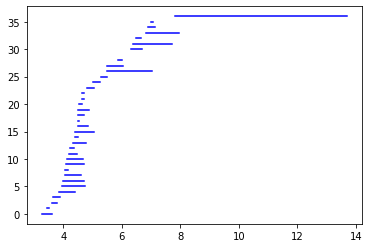

In [48]:
circ.plot_barcode(circ.rips['dgms'][1])

We see a clear dominant barcode. This might be an indication of a strong pattern correlation. 

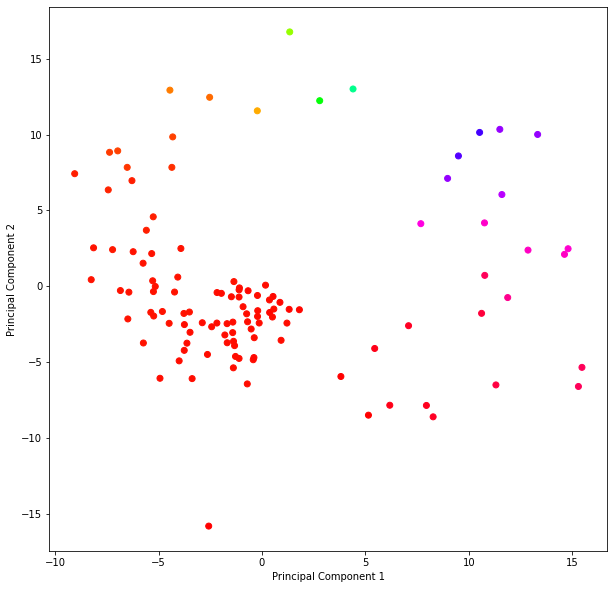

In [49]:
circ.plot_pca(features,vertex_values)

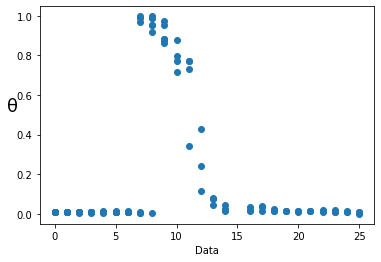

In [50]:
circ.plot_eps(df['Day Post Infection'],vertex_values)

We can see how the earliest and latest stages of the disease progression look identical to the circular coordinate – these are the times immediately after infection and the times when recovery has progressed relatively far. In between these two identical seeming stable regions lies a region – ranging from day 5 to day 15 – where the circular coordinate decreases monotonically with time.

Text(0, 0.5, 'Principal Component 2')

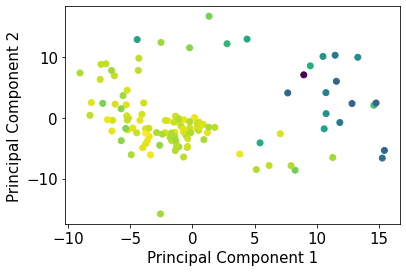

In [51]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(features)
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Temp'])
plt.tick_params(labelsize=15)
plt.xlabel('Principal Component 1', size=15)
plt.ylabel('Principal Component 2', size=15)

Above we can see the PCA plot of the data colored by body temperature. The region of points where the circular coordinate is changing corresponds precisely to the region of points where the body temperature is elevated.

Library also has methods to compute and plot circular coordinates by using epsilon from all persistence barcodes or binned over the largest barcode for further deep dive.

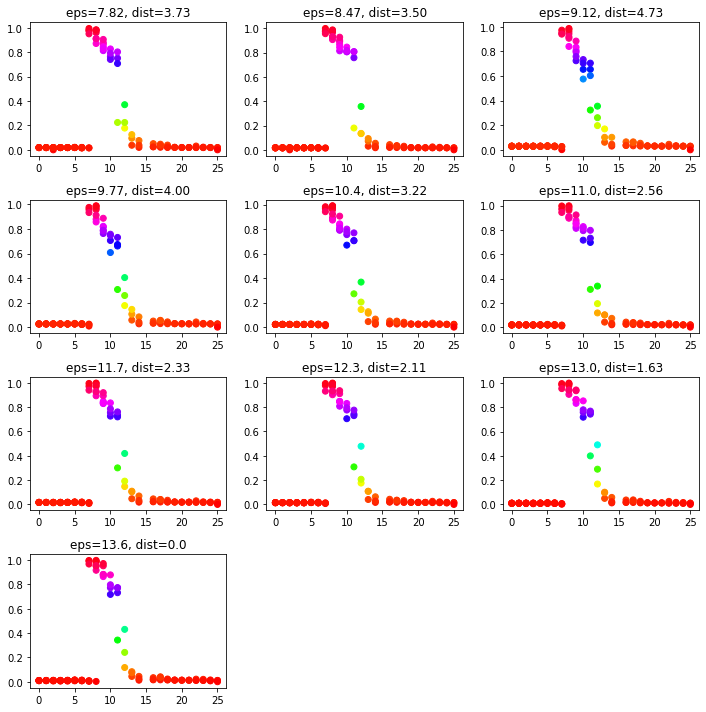

In [52]:
max_,vert_list_m=circ.circular_coordinate(circ.rips,circ.prime,check='Max')
all_,vert_list=circ.circular_coordinate(circ.rips,circ.prime,check='All')

circ.plot_eps(df['Day Post Infection'],max_,vert_list_m,vertex_values,type='2d_multi')


By plotting over the longest barcode, we can observe that change in epsilon in the range of the longest barcode has negligble effect on the circular coordinates. 

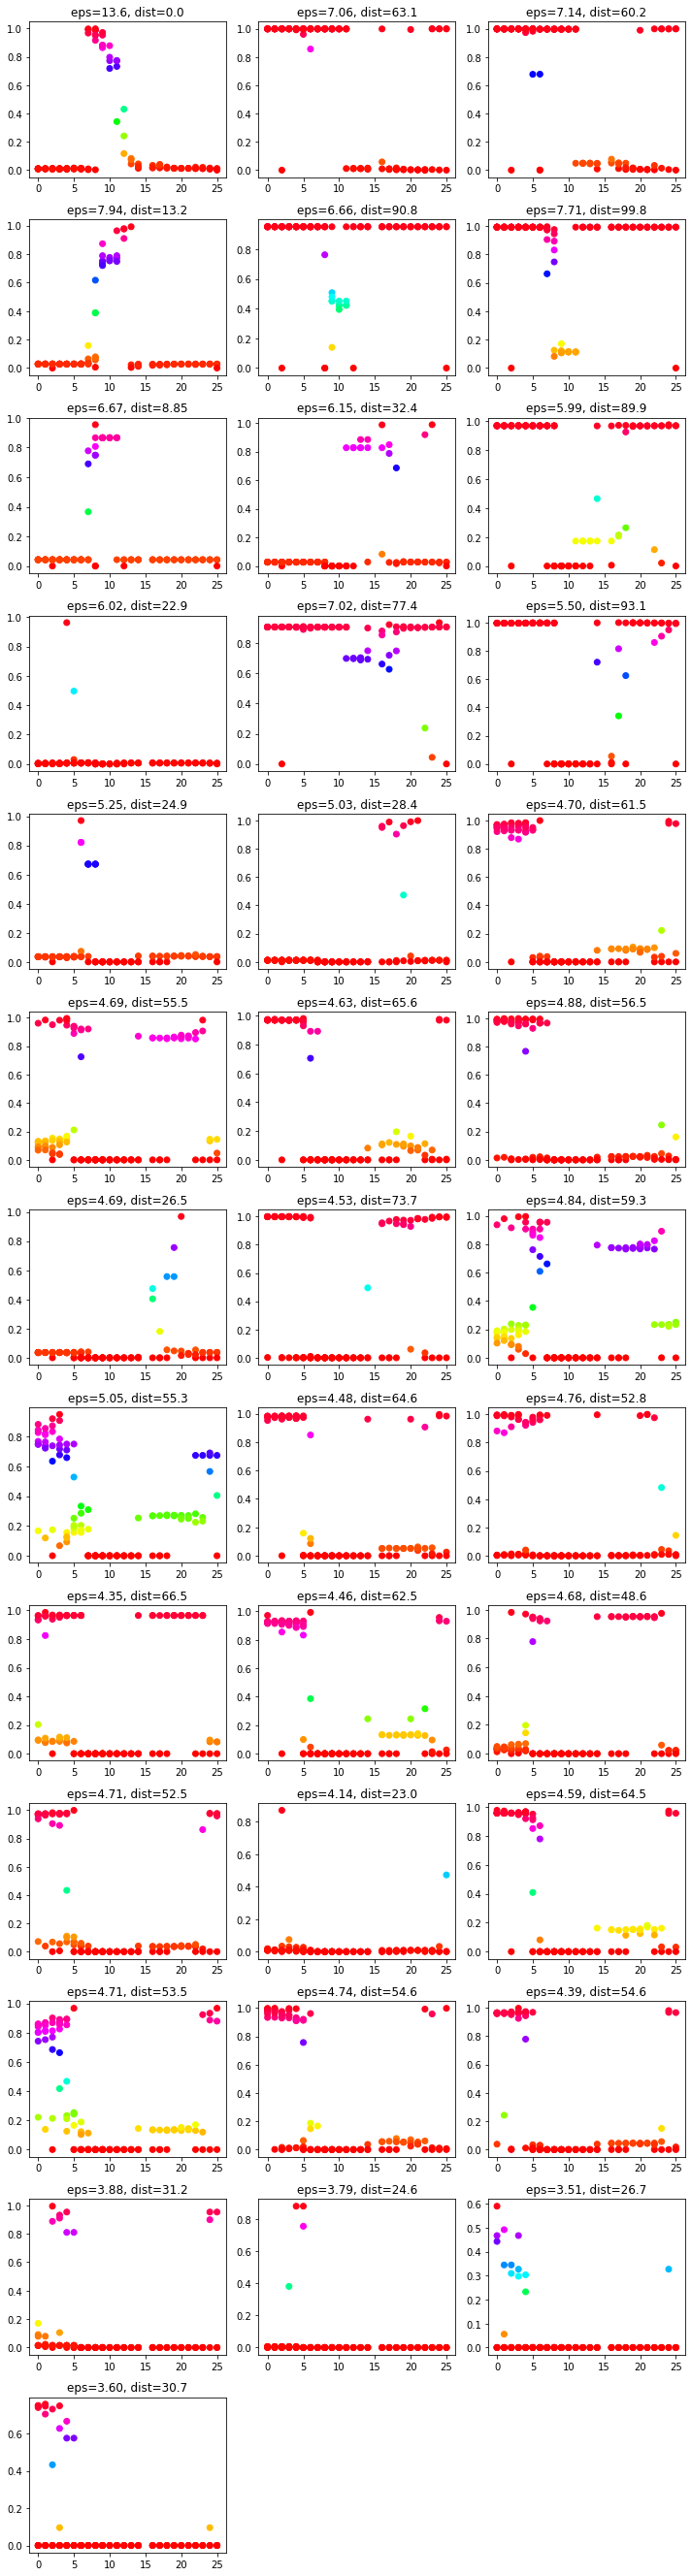

In [53]:
circ.plot_eps(df['Day Post Infection'],all_,vert_list,vertex_values,type='2d_multi')

Plotting all barcodes isnt very helpful in this scenario as it picks up alot of noise.

## 2.4. Third Dataset:  Hepatitis-C Data

In [54]:

df = pd.read_csv("GSE119117_counts_matrix.txt",sep="\t",index_col=0).T

df.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001630,ENSG00000001631,ENSG00000002016,ENSG00000002079,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,ENSG00000003402,...,ENSG00000261804,ENSG00000261805,ENSG00000261806,ENSG00000261807,ENSG00000261808,ENSG00000261809,ENSG00000261810,ENSG00000261811,ENSG00000261812,ENSG00000261813,ENSG00000261814,ENSG00000261815,ENSG00000261816,ENSG00000261817,ENSG00000261818,ENSG00000261819,ENSG00000261820,ENSG00000261821,ENSG00000261822,ENSG00000261823,ENSG00000261824,ENSG00000261825,ENSG00000261826,ENSG00000261827,ENSG00000261828,ENSG00000261829,ENSG00000261830,ENSG00000261831,ENSG00000261832,ENSG00000261833,ENSG00000261834,ENSG00000261835,ENSG00000261836,ENSG00000261837,ENSG00000261838,ENSG00000261839,ENSG00000261840,ENSG00000261841,ENSG00000261842,ENSG0_notinDB_NM_001276254
C1-1,25,0,809,488,160,19732,140,988,958,1314,103,1444,1132,831,1,0,1694,23,564,255,2,205,2332,7457,38,19,37,1,1100,9541,1027,1327,4439,7,0,82,69,325,1780,4088,...,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,0,29,2,0,103,0,0,0,0,0,0,0,0,0,0,2,6,16,0,3,1
C1-2,14,0,907,431,196,25035,173,1347,1033,1240,93,1711,1020,665,2,0,1853,27,578,188,0,260,8838,7499,13,7,15,0,1121,10756,1255,2306,5188,11,0,86,79,349,1719,4451,...,12,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,29,2,0,246,0,0,0,0,0,0,0,0,0,0,3,5,18,0,1,1
C1-3,22,0,723,480,158,19619,156,1017,1055,1433,119,1501,972,762,0,0,1733,13,551,222,0,182,4333,6942,10,8,7,2,1271,9349,968,1656,4490,9,0,89,51,348,1501,4115,...,11,0,0,0,0,0,0,0,1,0,0,0,1,0,0,9,0,0,0,0,25,1,0,146,0,0,0,0,0,0,0,0,0,0,4,4,23,0,1,4
C1-4,36,0,743,463,195,15863,195,941,1094,1572,107,1957,1158,824,3,0,1921,19,646,242,0,198,3329,8029,34,8,30,3,1491,9419,888,1419,4790,12,1,69,85,335,1638,3971,...,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,0,0,0,0,26,1,0,120,1,0,0,1,0,0,0,0,0,0,4,4,26,0,1,1
C2-1,32,0,926,624,229,22585,354,1399,1400,1827,135,1766,1265,1209,0,0,2521,41,874,383,3,230,5181,9729,21,11,7,0,1958,12200,1260,1569,5785,18,0,117,88,573,1667,5141,...,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,41,0,0,266,0,0,0,0,0,0,0,0,0,0,0,6,14,0,3,2


In [55]:

features = np.array(df)
circ=circularcoordinates.circular_coordinate(prime)
vertex_values=circ.fit_transform(features)

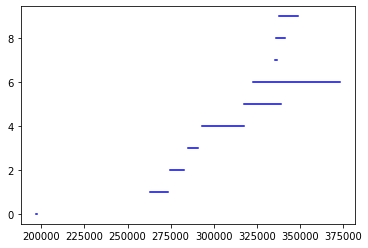

In [56]:
circ.plot_barcode(circ.rips['dgms'][1])

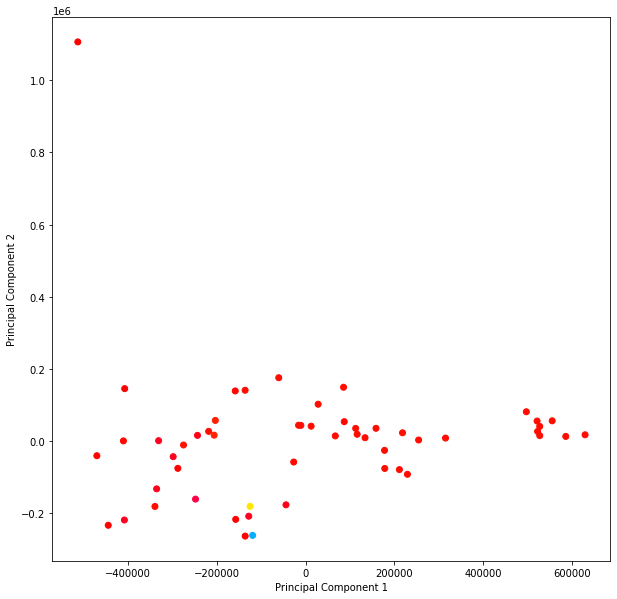

In [57]:
circ.plot_pca(features,vertex_values)

The circular coordinate function corresponding to the longest barcode shows variation along the visibly apparent cycle in the barcode plot but the variation in the coordinate is much more limited and not as strong an indication of a relevant structure

In [58]:
hepc_T = df.index.map(lambda s: int(s[-1]))

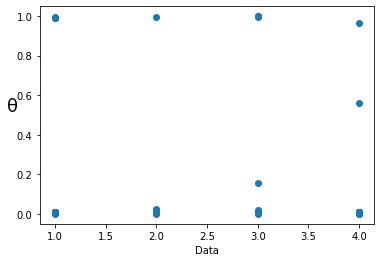

In [59]:
circ.plot_eps(hepc_T,vertex_values)


Lack of a pattern can also be seen when plotting the coordinates against the 4 stages of recovery.

## 2.5. Role of Geomstats/Giotto-TDA in the analysis

Although geomstats/giotto-tda did not play a role in our analysis in this notebook, we hope in the future to employ the giotto-tda library for this task as our code is incorporated into it.

# 3. Benchmark

We compare speed and ease of use of our library with one other well known library 'dionysus' which can be used to compute circular coordinates

In [28]:
import pandas as pd
import numpy as np
import time
import circularcoordinates
import  dionysus as d

df = pd.read_csv('malaria.csv')
features = df.drop(['Sample ID', 'Day Post Infection', 'Log PD', 'PD', 'RBC', 'Temp', 'Weight', 'Mouse Categorical', 'Mouse', 'Status Number', 'Status'],axis=1)
features = np.array(features)

In [29]:
st=time.time()
circ=circularcoordinates.circular_coordinate(11)
for x in range(10):
    vertex_values=circ.fit_transform(features)
print("Time taken with our library for 10 rounds of circular coordinate calculation:",time.time()-st)


st=time.time()
prime = 11
for x in range(10):
    f = d.fill_rips(features, 2, 15.0)
    p = d.cohomology_persistence(f, prime, True)
    dgms = d.init_diagrams(p, f)
    pt = max(dgms[1], key = lambda pt: pt.death - pt.birth)
    cocycle = p.cocycle(pt.data)
    f_restricted = d.Filtration([s for s in f if (s.data <= (pt.death))])
    vertex_values = d.smooth(f_restricted, cocycle, prime)
print("Time taken with dionysus for 10 rounds of circular coordinate calculation:",time.time()-st)

Time taken with our library for 10 rounds of circular coordinate calculation: 0.25019240379333496
Time taken with dionysus for 10 rounds of circular coordinate calculation: 152.8549952507019


As can be seen by using the ripser library as the backend to compute the Vietoris-Rips complex and subsequently the cohomlogy persistence functions, Our method is considerably faster and easier to use.

# 4. Limitations and perspectives

## Limitations of this analysis

Disease mapping can reflect cyclical structures present in full high-dimensional data space – but both Mapper paradigms and PCA projections can be prone to accidentally introducing cyclical structures in dimensionality reduced data. Cohomology barcodes and circular coordinate maps can help identify such false positives. That being said, circular coordinate maps are not a sure-fire way of obtaining intrinsic patterns in the dataset. Sometimes the coordinates might produce a map that cannot be explained by the data at hand or other times weak or no pattern may emerge as in the case of the HEP-C dataset. 

## Limitation of Geomstats and Giotto-TDA

Giotto-TDA provides limited tools to compute the cohomology persistence and therefore the circular coordinates .

## Proposed features for Geomstats and Giotto-TDA

Our library code is made to be compatible with the scikit workflow and can be used alongside Giotto-TDA. Therefore we propose to incorporate our library into Giotto-TDA so that circular coordinate calculation can be added as feature generation to any workflow.